In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.dates import DateFormatter

from load_wastewater_data import load_systems_data

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_04_03"

substance = "COVID" # one of PMMoV, COVID
degradation_setting = "no_decay" # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

In [5]:
plot_path = f"../plots/wastewater_model/rain_scenarios"
os.makedirs(os.path.join(plot_path), exist_ok=True)
file_name = f"concentrations_{substance}_{degradation_setting}"

Load data

In [4]:
rain_scenarios = ["KeinRegen", "Nieselregen", "MittelstarkerRegen"]

# Load data
df_1 = load_systems_data(experiment_series, substance, rain_scenarios[0], degradation_setting, file_type="concentrations")
df_2 = load_systems_data(experiment_series, substance, rain_scenarios[1], degradation_setting, file_type="concentrations")
df_3 = load_systems_data(experiment_series, substance, rain_scenarios[2], degradation_setting, file_type="concentrations")

df_1["rain_scenario"] = rain_scenarios[0]
df_2["rain_scenario"] = rain_scenarios[1]
df_3["rain_scenario"] = rain_scenarios[2]
df_rain = pd.concat([df_1, df_2, df_3])

## Visualizations

#### Plot rain scenarios on top of each other

In [6]:
def plot_rain_scenarios(df_rain, station, save_fig=False):
    fig, ax = plt.subplots(figsize = (12,6)) 
    df_sub = df_rain.loc[df_rain.sampling_point==station, :].sort_values("time")
    n_nans = df_sub.isna().sum()["copies/l"]
    print(f"{station}: {n_nans} NaNs detected, {df_sub.shape[0]} samples in total")
    if n_nans>0:
        print("Dropping NaNs")
        df_sub = df_sub.dropna()
    sns.lineplot(df_sub, x="time", y="copies/l", hue="rain_scenario")
    plt.title(f"{station}")
    plt.xlabel('simulation time [days]')
    plt.ylabel('virus levels [copies/l]')
    date_form = DateFormatter("%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.close(fig)
    return fig

16: 0 NaNs detected, 3024000 samples in total


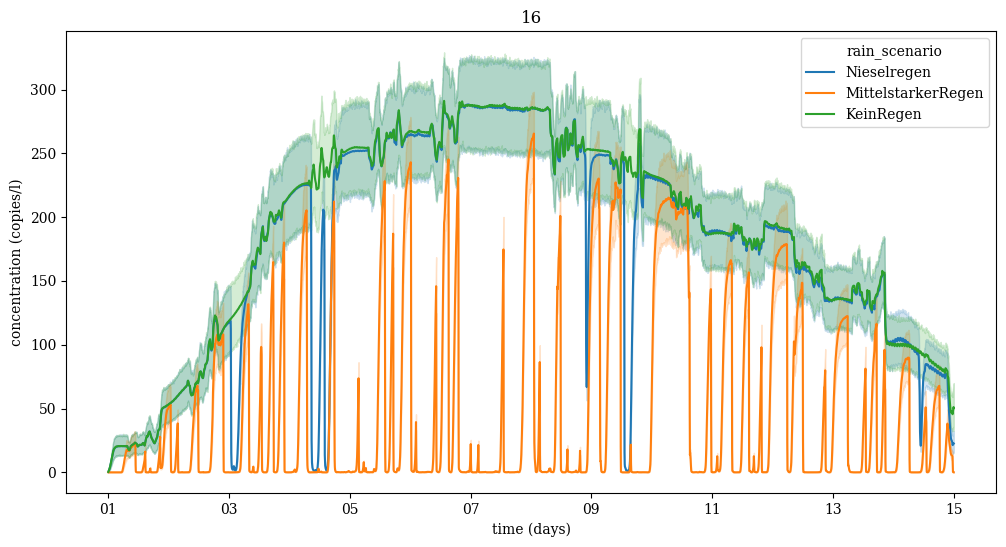

In [7]:
plot_rain_scenarios(df_rain, "16")

#### plot rain scenarios next to each other

In [8]:
date_form = DateFormatter("%-d")


def rain_scenarios_next_to_each_other(station):
    df_station = df_rain.loc[df_rain.sampling_point==station,:].sort_values("time")

    fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(18, 6), dpi=300)
    for i, (variate, variate_title) in enumerate(zip(["KeinRegen", "Nieselregen", "MittelstarkerRegen"], ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
        sns.lineplot(data=df_station.loc[df_station.rain_scenario==variate,:], x="time", y="copies/l", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
        axs[i].set_title(f"{variate_title}", fontsize=20)    
        axs[i].xaxis.set_major_formatter(date_form) 
        axs[i].set_xlabel(f"simulation time [days]", fontsize=15)
        if i==0:
            axs[i].set_ylabel(f"virus levels [copies/l]", fontsize=15)
        else:
            axs[i].set_ylabel("")
        axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
        axs[i].tick_params(axis='x', labelsize=12)
        axs[i].tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    fig.savefig(os.path.join(plot_path, file_name + f"_station_{station}.png"))
    plt.close(fig)

for station in ["16"]: # ["1", "8", "16"]:
    rain_scenarios_next_to_each_other(station)

/tmp/ipykernel_223914/1520601495.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_223914/1520601495.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_223914/1520601495.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
